## 군집화 Clustering 
- 데이터를 유사한 것끼리 모으는 것
- 유사도 & 분산 
    - 군집 간 유사도 낮게 -- 군집 간 분산 높게
    - 군집 간 유사도 높게 -- 군집 간 분산 낮게
- 활용
    - 고객 분류
    - 이상치 감지
    - 차원 축소 -> 클러스터 개수로 차원 나눔
    - 준지도 학습 -> 동일 클러스터에 레이블 형성
    - 이미지 분할 -> 색 기반 픽셀 클러스터 모음

### 군집화 평가
- 군집 평가 -> 군집 타당성 지표 Clustering Validity Index
    - 군집 간 거리 : 군집간 거리가 멀수록 군집화 잘 된 것 -> __Silhouette Index__
    - 군집의 분산 : 군집 내 요소가 흩어진 정도, 작을수록 군집화 잘 된 것 -> __Dunn Index__


### 종류
- 계층적 군집화
    - 가장 유사도가 높은 혹은 거리가 가까운 군집 두 개를 하나로 합치면서 군집 개수를 줄여가는 방법
    - 개체들 결합되는 순서: 트리형태 구조 __덴드로그램(Dendrogram)__
- 분할적 군집화
    - 군집수인 k를 지정한 후, 데이터들을 무작위로 k개의 집단으로 분할하고 다양한기준(평균, 최빈값 등)을 이용하여, centroid를 수정해나가며 집단을 다시 재분류하는 방법
    - 예시: K-Means, K-modes, K-medoids(sklearn미지원)

### K-Means 실습

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from keras import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.applications import VGG16
from keras.utils import plot_model # 모델 플롯 그리기
from keras.utils import set_random_seed # 랜덤 시드 설정
from keras.models import save_model, load_model # 모델 저장 및 로드
from PIL import Image  # 이미지 처리

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()
data = iris['data']
feature_names = iris['feature_names']

In [6]:
data.shape

(150, 4)

In [12]:
tdata = data[:,:2]
tdata

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [77]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
km.fit(tdata)

KMeans(n_clusters=2)

### cluster 객체 속성

In [17]:
print(f"cluster_centers : {km.cluster_centers_}")
print(f"labels : {km.labels_}")
print(f"labels_count : {np.unique(km.labels_)}")
print(f"inertia : {km.inertia_}")

cluster_centers : [[5.22409639 3.1313253 ]
 [6.61044776 2.96567164]]
labels : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1
 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 0]
labels_count : [0 1]
inertia : 58.20409278906673


In [78]:
# 샘플데이터 -> 결정된 군집으로 클러스터
tdata_km = km.transform(tdata)
tdata_km.shape

In [79]:
y_pred = km.fit_predict(tdata)

(150, 2)

In [70]:
dic = {0: 'tab:blue', 1:'tab:orange', 2:'tab:green', 3:'tab:red', 4:'tab:purple', 5:'tab:brown', 6:'tab:pink', 7:'tab:gray', 8:'tab:olive', 9:'tab:cyan'}

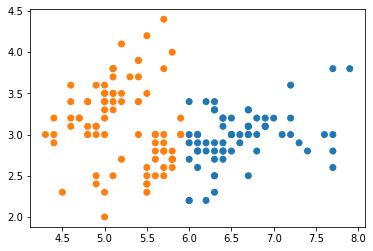

In [81]:
plt.scatter(tdata[:,0], tdata[:,1], c=[dic[i] for i in y_pred])
plt.show()

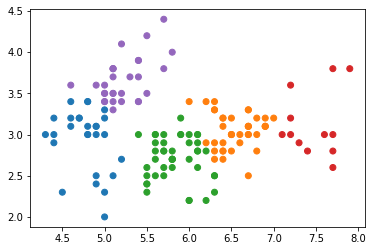

In [83]:
km = KMeans(n_clusters=5)
km.fit(tdata)
y_pred = km.fit_predict(tdata)
plt.scatter(tdata[:,0], tdata[:,1], c=[dic[i] for i in y_pred])
plt.show()

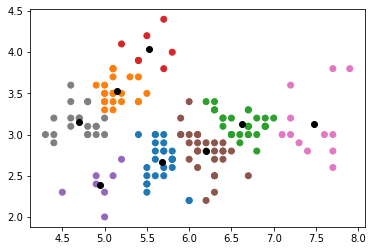

In [91]:
km = KMeans(n_clusters=8)
km.fit(tdata)
y_pred = km.fit_predict(tdata)
plt.scatter(tdata[:,0], tdata[:,1], c=[dic[i] for i in y_pred])
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c='black' )
plt.show()

In [93]:
from sklearn.metrics import silhouette_score
sil = []
for i in range(2,10):
    km = KMeans(n_clusters=i)
    km.fit(tdata)
    y_pred = km.fit_predict(tdata)
    sil.append(silhouette_score(tdata, y_pred))

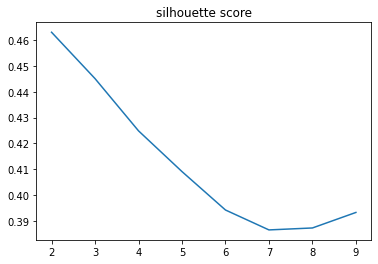

In [97]:
plt.plot(range(2,10), sil)
plt.title("silhouette score")
plt.show()

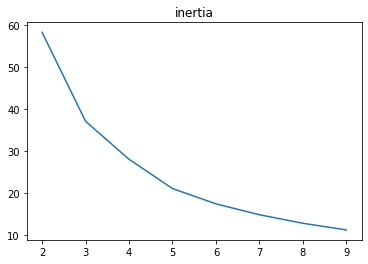

In [99]:
ine = []
for i in range(2,10):
    km = KMeans(n_clusters=i)
    km.fit(tdata)
    ine.append(km.inertia_)
plt.plot(range(2,10), ine)
plt.title("inertia")
plt.show()

### 군집화 이후 추가 작업
- 라벨과 데이터를 가지고 지도학습 분류로 성능 체크

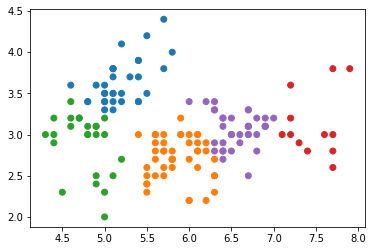

In [100]:
km = KMeans(n_clusters=5)
km.fit(tdata)
y_pred = km.fit_predict(tdata)
plt.scatter(tdata[:,0], tdata[:,1], c=[dic[i] for i in y_pred])
plt.show()

In [102]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(tdata, y_pred)
svc.predict(tdata)

array([0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0,
       0, 2, 0, 2, 0, 0, 4, 4, 4, 1, 4, 1, 4, 2, 4, 1, 2, 1, 1, 1, 1, 4,
       1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 4, 1, 4, 4, 4, 3, 2, 3, 4, 3,
       4, 4, 4, 1, 1, 4, 4, 3, 3, 1, 4, 1, 3, 1, 4, 3, 1, 1, 4, 4, 3, 3,
       4, 4, 1, 3, 4, 4, 1, 4, 4, 4, 1, 4, 4, 4, 1, 4, 4, 1])